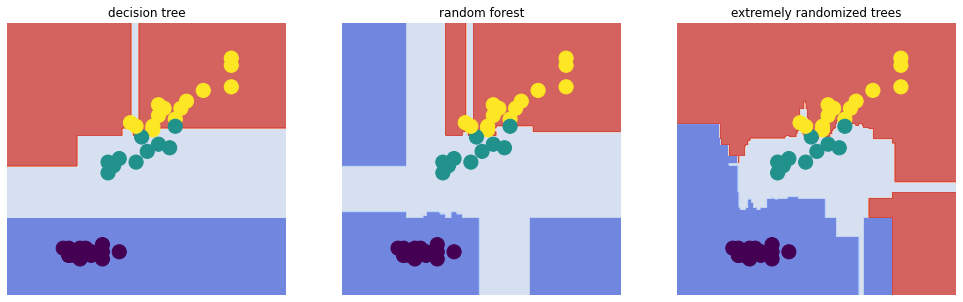

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# 結果表示用関数
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    ret = classifier.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

# Iris データ
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100
)

# ERT
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier(n_estimators=10, random_state=100)

extra_tree.fit(X_train, y_train)
extra_tree.score(X_test, y_test)

# 通常のランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

# 単一の決定木
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

# 3手法の結果比較
classifiers = [
    (1, 'decision tree', tree),
    (2, 'random forest', forest),
    (3, 'extremely randomized trees', extra_tree)
]

plt.figure(figsize=(17, 5))
for sp, name, model in classifiers:
    plt.subplot(1, 3, sp)
    plot_decision_boundary(model, X_test, y_test)
    plt.title(name)
    plt.axis('off')

